## Imports & Setup

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## EDA

In [4]:
df = pd.read_csv('../data/tod-on-main.csv')

In [60]:
before_df = df.filter(regex=r'^(Before)', axis=1)
before_df = before_df.drop(["Before 4 bedrooms", "Before 5 or more bedrooms", 'Before No bedrooms', 'Before 1 bedroom', "Before Apartment"], axis=1)

In [61]:
after_df = df.filter(regex=r'^(After)', axis=1)
after_df = after_df.drop(['After No bedrooms', 'After 1 bedroom', 'After Other attached dwelling'], axis=1)

In [62]:
before_df.columns = before_df.columns.str.replace(r'^\w+\s+', 'Change ', regex=True)
after_df.columns = after_df.columns.str.replace(r'^\w+\s+', 'Change ', regex=True)

In [64]:
difference_df = after_df - before_df

In [66]:
difference_df["n_movers_out_Lowincome"] = df["n_movers_out_Lowincome"]

In [71]:
difference_df.isnull().sum()


Change Population Density per square kilometre                  0
Change Dwellings                                               28
Change Total Occupied Private Dwellings                         0
Change Single-detached house                                    0
Change Semi-detached house                                      3
Change Row house                                                3
Change Apartment, duplex                                        3
Change Apartment, building that has fewer than five storeys     3
Change Apartment, building that has five or more storeys        1
Change Other dwelling                                          68
Change Other single-attached house                             24
Change Movable dwelling                                         0
Change 0 to 1 bedroom                                          64
Change 2 bedrooms                                              64
Change 3 bedrooms                                              64
Change 4 o

In [74]:
nan_counts = difference_df.isnull().sum()


In [76]:
columns_to_drop = nan_counts[nan_counts > 20].index

In [77]:
cleaned_df = difference_df.drop(columns=columns_to_drop)

In [78]:
cleaned_df

,Change Population Density per square kilometre,Change Total Occupied Private Dwellings,Change Single-detached house,Change Semi-detached house,Change Row house,"Change Apartment, duplex","Change Apartment, building that has fewer than five storeys","Change Apartment, building that has five or more storeys",Change Movable dwelling,Change Owned,Change Rented,n_movers_out_Lowincome
0,1095.597195,61.677499,-42.539940,-9.600507,1.238730,38.765488,57.576281,-0.464939,-0.005523,3.789884,96.124023,4300.0
1,-779.491684,89.694156,0.510533,-11.826668,42.810963,2.103387,59.605595,0.000000,0.000000,9.125176,54.644013,3230.0
2,25284.884324,-22.168435,-329.050186,140.893582,-37.492917,16.010693,196.012260,0.192841,-9.587018,-138.753774,127.887968,3525.0
3,-54.058051,72.202927,4.969385,NaN,NaN,NaN,NaN,13.926568,0.000000,76.710062,-2.803474,7560.0
4,18877.740252,-40.566288,-77.291407,-36.450202,49.718430,10.001887,109.209702,0.000000,-91.828328,39.130931,-84.510315,6410.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65,11680.829979,-188.049194,-67.607051,-17.698188,111.544572,62.970222,-166.473499,-93.101270,-4.177069,35.066295,-240.312060,6150.0
66,136645.143559,6448.940354,-7.523282,-0.024781,122.743024,-4.739731,-214.872238,6542.339135,-5.000000,2555.753834,4257.012461,40400.0
67,228103.384518,1145.759719,-262.354332,42.037694,93.541688,-106.739942,1020.346489,359.946458,0.000000,298.131957,819.841384,59895.0
68,34677.052585,3002.637908,-5.000000,0.000000,49.852178,-29.009326,-297.934437,3269.791124,0.000000,1629.854442,1602.970045,31690.0


<Axes: >

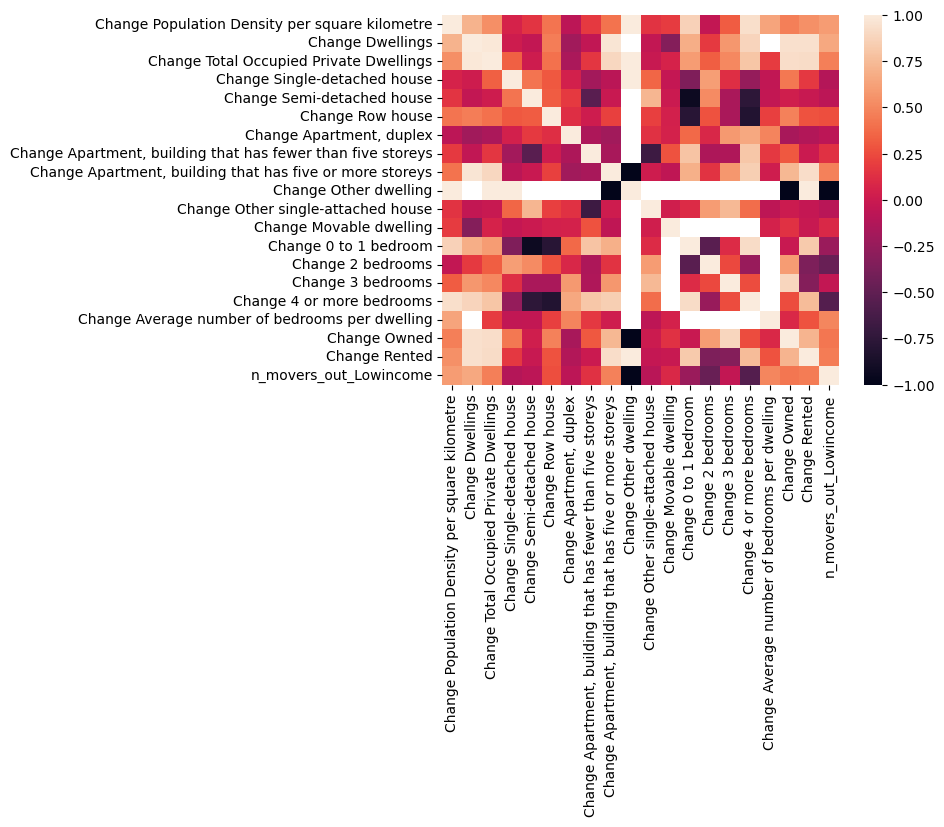

In [69]:
sns.heatmap(corr)

In [91]:
cleaned_df = cleaned_df.fillna(cleaned_df.mean())

## Baseline Model
This is a super simple model that has removed columns with over 20 missing rows and imputed NaN values with mean. 

In [105]:
y = cleaned_df["n_movers_out_Lowincome"]
X = cleaned_df.drop(columns=["n_movers_out_Lowincome"])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test)

In [109]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [110]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error (MSE): 812037140.855561
R² Score: -18.611836140185137
Intercept: 10562.739253022704
Coefficients: [ 1.83098682e-01  5.51947657e+01 -3.57416937e+01 -4.37494030e+01
 -4.94890014e+01 -3.38367962e+00 -2.84806009e+01 -2.55438506e+01
 -6.16601868e+02 -1.77539339e+01 -3.27374978e+01]


## Baseline with Standarization
(No change)

In [113]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(cleaned_df), columns=cleaned_df.columns)

In [120]:
y = cleaned_df["n_movers_out_Lowincome"]
X = scaled_df.drop(columns=["n_movers_out_Lowincome"])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred = model.predict(X_test)

In [124]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [125]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error (MSE): 812037140.8555559
R² Score: -18.611836140185012
Intercept: 18076.53101397001
Coefficients: [ 10974.73708623  69600.09849635 -11090.56611976  -6406.50128458
  -4908.36187469   -251.32933106 -14460.99603478 -29187.82100608
  -8345.7108375  -11866.65649673 -24824.0347506 ]
